In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
import os
import geopandas as gpd
from shapely.geometry import Point, Polygon


     |████████████████████████████████| 1.0MB 5.7MB/s 
     |████████████████████████████████| 15.3MB 285kB/s 
     |████████████████████████████████| 6.5MB 41.6MB/s 


In [ ]:
#dfAccidents=pd.read_csv('/content/drive/My Drive/CRASHSKRRT_ML_Project/traffic_accidents.csv')
dfAccidents=pd.read_csv('/content/drive/My Drive/traffic_accidents.csv')

#dfAccidents.columns

cols = ['OBJECTID_1','INCIDENT_ID','OFFENSE_ID','OFFENSE_CODE','OFFENSE_CODE_EXTENSION',
        'LAST_OCCURRENCE_DATE','GEO_X','GEO_Y','DISTRICT_ID','PRECINCT_ID','HARMFUL_EVENT_SEQ_1','HARMFUL_EVENT_SEQ_2','HARMFUL_EVENT_SEQ_3',
        'ROAD_LOCATION','TU1_VEHICLE_TYPE','TU1_TRAVEL_DIRECTION','TU1_VEHICLE_MOVEMENT',
        'TU1_DRIVER_ACTION','TU1_DRIVER_HUMANCONTRIBFACTOR','TU1_PEDESTRIAN_ACTION','TU2_VEHICLE_TYPE',
        'TU2_VEHICLE_MOVEMENT','TU2_DRIVER_ACTION','TU2_DRIVER_HUMANCONTRIBFACTOR','TU2_PEDESTRIAN_ACTION'
        ,'FATALITY_MODE_1','FATALITY_MODE_2','SERIOUSLY_INJURED_MODE_1','SERIOUSLY_INJURED_MODE_2', 'INCIDENT_ADDRESS','TOP_TRAFFIC_ACCIDENT_OFFENSE', 'REPORTED_DATE']


dfAccidents = dfAccidents.drop(columns=cols)

#dfAccidents.describe()
dfAccidents.columns

Index(['FIRST_OCCURRENCE_DATE', 'GEO_LON', 'GEO_LAT', 'NEIGHBORHOOD_ID',
       'BICYCLE_IND', 'PEDESTRIAN_IND', 'ROAD_DESCRIPTION', 'ROAD_CONTOUR',
       'ROAD_CONDITION', 'LIGHT_CONDITION', 'TU2_TRAVEL_DIRECTION',
       'SERIOUSLY_INJURED', 'FATALITIES'],
      dtype='object')

In [ ]:
geo_df = dfAccidents

geo_df['CASUALTIES'] = casualties = geo_df['SERIOUSLY_INJURED'] + geo_df["FATALITIES"]
old_cols = ['SERIOUSLY_INJURED', 'FATALITIES']
geo_df = geo_df.drop(columns=old_cols)

geo_df["FIRST_OCCURRENCE_DATE"] = geo_df["FIRST_OCCURRENCE_DATE"].astype(str)
geo_df[['DATE','TIME']] = geo_df.FIRST_OCCURRENCE_DATE.str.split(expand=True) 
geo_df = geo_df.drop(columns=['FIRST_OCCURRENCE_DATE'])
geo_df["DATE"] = geo_df["DATE"].astype(str)
geo_df["TIME"] = geo_df["TIME"].astype(str)
for i in range(0,len(geo_df['DATE'])):
    if len(geo_df['DATE'][i]) == 6:
        geo_df['DATE'][i]= '0' + geo_df['DATE'][i]

geo_df = geo_df.dropna() 
geo_df['MONTH'] = pd.to_datetime(geo_df['DATE'].str.strip(), format='%m/%d/%y', errors = 'coerce').dt.strftime('%m')
geo_df['DAY'] = pd.to_datetime(geo_df['DATE'].str.strip(), format='%m/%d/%y', errors = 'coerce').dt.strftime('%d')
geo_df['YEAR'] = pd.to_datetime(geo_df['DATE'].str.strip(), format='%m/%d/%y', errors = 'coerce').dt.strftime('%y')
geo_df = geo_df.dropna() 
geo_df['TIME_HR'] = pd.to_datetime(geo_df['TIME'].str.strip(), format='%H:%M').dt.strftime('%H')
geo_df['TIME_MIN'] = pd.to_datetime(geo_df['TIME'].str.strip(), format='%H:%M').dt.strftime('%M')
geo_df = geo_df.dropna() 
geo_df = geo_df.drop(columns=['DATE','TIME'])
geo_df = geo_df.dropna() 
geo_df['MONTH'] = geo_df['MONTH'].astype(int)
geo_df['DAY'] = geo_df['DAY'].astype(int) 
geo_df['YEAR']= geo_df['YEAR'].astype(int) 
geo_df['TIME_HR']= geo_df['TIME_HR'].astype(int)
geo_df['TIME_MIN']= geo_df['TIME_MIN'].astype(int)
geo_df = geo_df.dropna() 
print(geo_df.columns)
print("altered:", geo_df.size)
print("original:", dfAccidents.size)
print("% of data lost:", 100*((dfAccidents.size- geo_df.size)/geo_df.size), "percent")
geo_df = pd.get_dummies(geo_df)
pd.set_option('display.max_columns', None)
print(geo_df.columns)
print(geo_df.info(verbose=True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['GEO_LON', 'GEO_LAT', 'NEIGHBORHOOD_ID', 'BICYCLE_IND',
       'PEDESTRIAN_IND', 'ROAD_DESCRIPTION', 'ROAD_CONTOUR', 'ROAD_CONDITION',
       'LIGHT_CONDITION', 'TU2_TRAVEL_DIRECTION', 'CASUALTIES', 'MONTH', 'DAY',
       'YEAR', 'TIME_HR', 'TIME_MIN'],
      dtype='object')
altered: 2562608
original: 2657578
% of data lost: 3.705990147537196 percent
Index(['GEO_LON', 'GEO_LAT', 'BICYCLE_IND', 'PEDESTRIAN_IND', 'CASUALTIES',
       'MONTH', 'DAY', 'YEAR', 'TIME_HR', 'TIME_MIN',
       ...
       'TU2_TRAVEL_DIRECTION_  ', 'TU2_TRAVEL_DIRECTION_EAST',
       'TU2_TRAVEL_DIRECTION_NORTH', 'TU2_TRAVEL_DIRECTION_NORTHEAST',
       'TU2_TRAVEL_DIRECTION_NORTHWEST', 'TU2_TRAVEL_DIRECTION_OTHER',
       'TU2_TRAVEL_DIRECTION_SOUTH', 'TU2_TRAVEL_DIRECTION_SOUTHEAST',
       'TU2_TRAVEL_DIRECTION_SOUTHWEST', 'TU2_TRAVEL_DIRECTION_WEST'],
      dtype='object', length=132)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 160163 entries, 0 to 189826
Data columns (total 132 columns):
 #   C

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(geo_df)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([4.0e+05, 1.7e+01])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(geo_df)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=geo_df.columns)

# visualize the data frame
df_scaled


,GEO_LON,GEO_LAT,BICYCLE_IND,PEDESTRIAN_IND,CASUALTIES,MONTH,DAY,YEAR,TIME_HR,TIME_MIN,NEIGHBORHOOD_ID_Athmar Park,NEIGHBORHOOD_ID_Auraria,NEIGHBORHOOD_ID_Baker,NEIGHBORHOOD_ID_Barnum,NEIGHBORHOOD_ID_Barnum West,NEIGHBORHOOD_ID_Bear Valley,NEIGHBORHOOD_ID_Belcaro,NEIGHBORHOOD_ID_Berkeley,NEIGHBORHOOD_ID_CBD,NEIGHBORHOOD_ID_Capitol Hill,NEIGHBORHOOD_ID_Central Park,NEIGHBORHOOD_ID_Chaffee Park,NEIGHBORHOOD_ID_Cheesman Park,NEIGHBORHOOD_ID_Cherry Creek,NEIGHBORHOOD_ID_City Park,NEIGHBORHOOD_ID_City Park West,NEIGHBORHOOD_ID_Civic Center,NEIGHBORHOOD_ID_Clayton,NEIGHBORHOOD_ID_Cole,NEIGHBORHOOD_ID_College View - South Platte,NEIGHBORHOOD_ID_Congress Park,NEIGHBORHOOD_ID_Cory - Merrill,NEIGHBORHOOD_ID_Country Club,NEIGHBORHOOD_ID_DIA,NEIGHBORHOOD_ID_East Colfax,NEIGHBORHOOD_ID_Elyria Swansea,NEIGHBORHOOD_ID_Five Points,NEIGHBORHOOD_ID_Fort Logan,NEIGHBORHOOD_ID_Gateway - Green Valley Ranch,NEIGHBORHOOD_ID_Globeville,NEIGHBORHOOD_ID_Goldsmith,NEIGHBORHOOD_ID_Hale,NEIGHBORHOOD_ID_Hampden,NEIGHBORHOOD_ID_Hampden South,NEIGHBORHOOD_ID_Harvey Park,NEIGHBORHOOD_ID_Harvey Park South,NEIGHBORHOOD_ID_Highland,NEIGHBORHOOD_ID_Hilltop,NEIGHBORHOOD_ID_Indian Creek,NEIGHBORHOOD_ID_Jefferson Park,NEIGHBORHOOD_ID_Kennedy,NEIGHBORHOOD_ID_Lincoln Park,NEIGHBORHOOD_ID_Lowry Field,NEIGHBORHOOD_ID_Mar Lee,NEIGHBORHOOD_ID_Marston,NEIGHBORHOOD_ID_Montbello,NEIGHBORHOOD_ID_Montclair,NEIGHBORHOOD_ID_North Capitol Hill,NEIGHBORHOOD_ID_North Park Hill,NEIGHBORHOOD_ID_Northeast Park Hill,NEIGHBORHOOD_ID_Overland,NEIGHBORHOOD_ID_Platt Park,NEIGHBORHOOD_ID_Regis,NEIGHBORHOOD_ID_Rosedale,NEIGHBORHOOD_ID_Ruby Hill,NEIGHBORHOOD_ID_Skyland,NEIGHBORHOOD_ID_Sloan Lake,NEIGHBORHOOD_ID_South Park Hill,NEIGHBORHOOD_ID_Southmoor Park,NEIGHBORHOOD_ID_Speer,NEIGHBORHOOD_ID_Stapleton,NEIGHBORHOOD_ID_Sun Valley,NEIGHBORHOOD_ID_Sunnyside,NEIGHBORHOOD_ID_Union Station,NEIGHBORHOOD_ID_University,NEIGHBORHOOD_ID_University Hills,NEIGHBORHOOD_ID_University Park,NEIGHBORHOOD_ID_Valverde,NEIGHBORHOOD_ID_Villa Park,NEIGHBORHOOD_ID_Virginia Village,NEIGHBORHOOD_ID_Washington Park,NEIGHBORHOOD_ID_Washington Park West,NEIGHBORHOOD_ID_Washington Virginia Vale,NEIGHBORHOOD_ID_Wellshire,NEIGHBORHOOD_ID_West Colfax,NEIGHBORHOOD_ID_West Highland,NEIGHBORHOOD_ID_Westwood,NEIGHBORHOOD_ID_Whittier,NEIGHBORHOOD_ID_Windsor,ROAD_DESCRIPTION_,ROAD_DESCRIPTION_ALLEY RELATED,ROAD_DESCRIPTION_AT INTERSECTION,ROAD_DESCRIPTION_DRIVEWAY ACCESS RELATED,ROAD_DESCRIPTION_HIGHWAY INTERCHANGE,ROAD_DESCRIPTION_INTERSECTION RELATED,ROAD_DESCRIPTION_NON INTERSECTION,ROAD_DESCRIPTION_PARKING LOT,ROAD_DESCRIPTION_ROUNDABOUT,ROAD_CONTOUR_,ROAD_CONTOUR_CURVE ON-GRADE,ROAD_CONTOUR_CURVE ON-LEVEL,ROAD_CONTOUR_HILLCREST,ROAD_CONTOUR_STRAIGHT ON-GRADE,ROAD_CONTOUR_STRAIGHT ON-LEVEL,ROAD_CONDITION_,ROAD_CONDITION_DRY,ROAD_CONDITION_DRY WITH VISIBLE ICY ROAD TREATMENT,ROAD_CONDITION_FOREIGN MATERIAL,ROAD_CONDITION_ICY,ROAD_CONDITION_ICY WITH VISIBLE ICY ROAD TREATMENT,ROAD_CONDITION_MUDDY,ROAD_CONDITION_SLUSHY,ROAD_CONDITION_SLUSHY WITH VISIBLE ICY ROAD TREATMENT,ROAD_CONDITION_SNOWY,ROAD_CONDITION_SNOWY WITH VISIBLE ICY ROAD TREATMENT,ROAD_CONDITION_WET,ROAD_CONDITION_WET WITH VISIBLE ICY ROAD TREATMENT,LIGHT_CONDITION_,LIGHT_CONDITION_DARK-LIGHTED,LIGHT_CONDITION_DARK-UNLIGHTED,LIGHT_CONDITION_DAWN OR DUSK,LIGHT_CONDITION_DAY LIGHT,TU2_TRAVEL_DIRECTION_,TU2_TRAVEL_DIRECTION_EAST,TU2_TRAVEL_DIRECTION_NORTH,TU2_TRAVEL_DIRECTION_NORTHEAST,TU2_TRAVEL_DIRECTION_NORTHWEST,TU2_TRAVEL_DIRECTION_OTHER,TU2_TRAVEL_DIRECTION_SOUTH,TU2_TRAVEL_DIRECTION_SOUTHEAST,TU2_TRAVEL_DIRECTION_SOUTHWEST,TU2_TRAVEL_DIRECTION_WEST
0,-0.999195,0.995894,0.0,0.0,0.0,0.083333,0.064516,0.904762,0.869565,0.847458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

In [ ]:
df_scaled = df_scaled.dropna()
df_scaled = df_scaled.reset_index()

In [ ]:
# Get indexes where name column has value
no_cst = df_scaled[df_scaled['CASUALTIES'] == 0]
csts = df_scaled[df_scaled['CASUALTIES'] != 0]
l = len(csts.index)
no_cst = no_cst.sample(n=l, random_state=1)
# Delete these row indexes from dataFrame
class_data = result = pd.concat([no_cst, csts])
class_data['CASUALTIES'].value_counts()

0.000000    3726
0.142857    3306
0.285714     319
0.428571      69
0.571429      20
0.714286       8
0.857143       2
1.000000       2
Name: CASUALTIES, dtype: int64

In [ ]:
df_targets = class_data["CASUALTIES"]
df_features = class_data.drop(columns=["CASUALTIES"])
df_targets.head()
df_targets.value_counts()

0.000000    3726
0.142857    3306
0.285714     319
0.428571      69
0.571429      20
0.714286       8
0.857143       2
1.000000       2
Name: CASUALTIES, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#csts = class_data[class_data['CASUALTIES'] != 0]
class_data.loc[(class_data.CASUALTIES != 0),'CASUALTIES'] = 1
class_data['CASUALTIES'].value_counts()

df_targets = class_data["CASUALTIES"]
df_features = class_data.drop(columns=["CASUALTIES"])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=0)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE

k = 15
mi_transformer = SelectKBest(k=k).fit(X_train, y_train) 

mi_X_test = mi_transformer.transform(X_test)

mi_X_train = mi_transformer.transform(X_train)

#for feature, importance in zip(df_features.columns, mi_transformer.scores_):
    #print(f"The MI score for {feature} is {importance}")

score_lookup = {}
for feature, importance in zip(df_features.columns, mi_transformer.scores_):
    score_lookup[feature]  = importance
   # print(f"The MI score for {feature} is {importance}")

sort_lookup = sorted(score_lookup.items(), key=lambda x: x[1], reverse=True)

for i in range(len(sort_lookup)):
  print(sort_lookup[i])
columns = []
for i in range(len(sort_lookup)):
  if ( sort_lookup[i][1] < 40):
    columns.append(sort_lookup[i][0])

df_features =df_features.drop(columns = columns)
print(columns)

('PEDESTRIAN_IND', 582.3942116760354)
('LIGHT_CONDITION_DAY LIGHT', 153.6970662789703)
('LIGHT_CONDITION_DARK-LIGHTED', 146.59681561068268)
('BICYCLE_IND', 124.55011473823113)
('ROAD_DESCRIPTION_AT INTERSECTION', 97.3273712701668)
('TU2_TRAVEL_DIRECTION_  ', 87.15657525108426)
('ROAD_DESCRIPTION_PARKING LOT', 66.95374998111072)
('TU2_TRAVEL_DIRECTION_NORTH', 27.513257796854663)
('ROAD_DESCRIPTION_NON INTERSECTION', 24.52184245368014)
('ROAD_CONDITION_SNOWY', 24.456289288986206)
('ROAD_CONDITION_DRY', 17.676169368057227)
('TIME_MIN', 16.826059486517845)
('NEIGHBORHOOD_ID_Speer', 16.753450160534925)
('NEIGHBORHOOD_ID_Harvey Park', 16.578685175046918)
('NEIGHBORHOOD_ID_Belcaro', 16.54141579627754)
('ROAD_DESCRIPTION_INTERSECTION RELATED', 15.514371452469094)
('NEIGHBORHOOD_ID_Cherry Creek', 12.011219687664903)
('LIGHT_CONDITION_DARK-UNLIGHTED', 10.475056210735955)
('NEIGHBORHOOD_ID_Montbello', 9.754402605862925)
('ROAD_DESCRIPTION_HIGHWAY INTERCHANGE', 9.701455726080582)
('NEIGHBORHOOD_ID

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=0)

from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE

k = 'all'
mi_transformer = SelectKBest(k=k).fit(X_train, y_train) 

mi_X_test = mi_transformer.transform(X_test)

mi_X_train = mi_transformer.transform(X_train)

#for feature, importance in zip(df_features.columns, mi_transformer.scores_):
    #print(f"The MI score for {feature} is {importance}")

score_lookup = {}
for feature, importance in zip(df_features.columns, mi_transformer.scores_):
    score_lookup[feature]  = importance
    print(f"The MI score for {feature} is {importance}")


The MI score for BICYCLE_IND is 124.55011473823113
The MI score for PEDESTRIAN_IND is 582.3942116760354
The MI score for ROAD_DESCRIPTION_AT INTERSECTION is 97.3273712701668
The MI score for ROAD_DESCRIPTION_PARKING LOT is 66.95374998111072
The MI score for LIGHT_CONDITION_DARK-LIGHTED is 146.59681561068268
The MI score for LIGHT_CONDITION_DAY LIGHT is 153.6970662789703
The MI score for TU2_TRAVEL_DIRECTION_   is 87.15657525108426


In [ ]:

df_features = df_features.drop(columns = 'TU2_TRAVEL_DIRECTION_  ')
print(df_features.columns)

Index(['BICYCLE_IND', 'PEDESTRIAN_IND', 'ROAD_DESCRIPTION_AT INTERSECTION',
       'ROAD_DESCRIPTION_PARKING LOT', 'LIGHT_CONDITION_DARK-LIGHTED',
       'LIGHT_CONDITION_DAY LIGHT'],
      dtype='object')


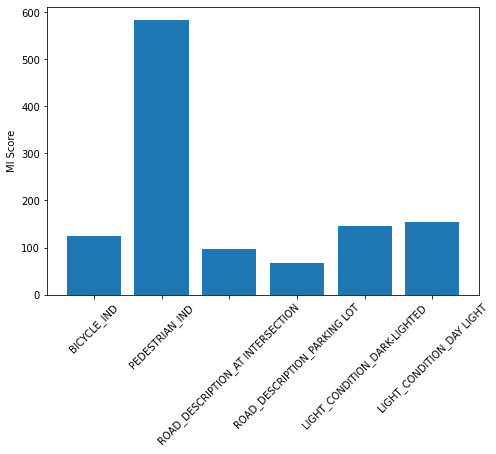

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = []
students = []
for feature, importance in zip(df_features.columns, mi_transformer.scores_):
  langs.append(feature)
  students.append(importance)
ax.bar(langs,students)
plt.ylabel("MI Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:

#need to drop TU2_TRAVEL_DIRECTION_  since it is just indicating a whitespace was entered

df_features = df_features.drop(columns = 'TU2_TRAVEL_DIRECTION_  ')
print(df_features.columns)

Index(['BICYCLE_IND', 'PEDESTRIAN_IND', 'ROAD_DESCRIPTION_AT INTERSECTION',
       'ROAD_DESCRIPTION_PARKING LOT', 'LIGHT_CONDITION_DARK-LIGHTED',
       'LIGHT_CONDITION_DAY LIGHT'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# load the breast_cancer data set from the scikit-learn api

# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = df_features.corr()


#Selecting highly correlated features
#relevant_features = corr[corr>0.2]
#print(relevant_features)
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

NameError: ignored

In [ ]:
#####
#### below are the finalized features and targets we train the model on so we need to make a csv out of those #######
#####


In [ ]:
df_features

,BICYCLE_IND,PEDESTRIAN_IND,ROAD_DESCRIPTION_AT INTERSECTION,ROAD_DESCRIPTION_PARKING LOT,LIGHT_CONDITION_DARK-LIGHTED,LIGHT_CONDITION_DAY LIGHT
26128,0.0,0.00,0.0,0.0,0.0,1.0
80098,0.0,0.00,1.0,0.0,0.0,1.0
68237,0.0,0.00,0.0,1.0,0.0,1.0
41501,0.0,0.00,1.0,0.0,0.0,1.0
68180,0.0,0.00,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
159730,0.0,0.00,0.0,0.0,0.0,1.0
159749,0.0,0.25,1.0,0.0,0.0,1.0
159789,0.0,0.00,0.0,0.0,1.0,0.0
160110,0.0,0.00,0.0,0.0,0.0,1.0


In [ ]:
features_csv = df_features.to_csv(index=True)
print(features_csv)

,BICYCLE_IND,PEDESTRIAN_IND,ROAD_DESCRIPTION_AT INTERSECTION,ROAD_DESCRIPTION_PARKING LOT,LIGHT_CONDITION_DARK-LIGHTED,LIGHT_CONDITION_DAY LIGHT
26128,0.0,0.0,0.0,0.0,0.0,1.0
80098,0.0,0.0,1.0,0.0,0.0,1.0
68237,0.0,0.0,0.0,1.0,0.0,1.0
41501,0.0,0.0,1.0,0.0,0.0,1.0
68180,0.0,0.0,0.0,0.0,0.0,1.0
16381,0.0,0.0,0.0,0.0,0.0,1.0
155172,0.0,0.0,0.0,0.0,0.0,1.0
148101,0.0,0.0,0.0,0.0,0.0,1.0
87229,0.0,0.0,1.0,0.0,0.0,1.0
24523,0.0,0.0,1.0,0.0,0.0,1.0
77898,0.0,0.0,0.0,0.0,0.0,1.0
81248,0.0,0.0,1.0,0.0,1.0,0.0
118039,0.0,0.0,0.0,0.0,0.0,1.0
110000,0.0,0.0,1.0,0.0,1.0,0.0
19086,0.0,0.0,1.0,0.0,1.0,0.0
157649,0.0,0.0,1.0,0.0,0.0,1.0
78378,0.0,0.0,1.0,0.0,0.0,1.0
121477,0.0,0.0,0.0,0.0,0.0,1.0
36241,0.0,0.0,1.0,0.0,0.0,1.0
55421,0.0,0.0,0.0,0.0,1.0,0.0
93815,0.0,0.0,0.0,0.0,0.0,1.0
35644,0.0,0.0,0.0,0.0,0.0,1.0
117802,0.0,0.0,1.0,0.0,1.0,0.0
153617,0.0,0.0,0.0,1.0,1.0,0.0
30749,0.0,0.0,0.0,0.0,0.0,1.0
9117,0.0,0.0,0.0,0.0,1.0,0.0
21728,0.0,0.0,0.0,1.0,0.0,1.0
23426,0.0,0.0,0.0,0.0,1.0,0.0
107487,0

In [ ]:
df_targets

26128     0.0
80098     0.0
68237     0.0
41501     0.0
68180     0.0
         ... 
159730    1.0
159749    1.0
159789    1.0
160110    1.0
160130    1.0
Name: CASUALTIES, Length: 7452, dtype: float64

In [ ]:
labels_csv = df_targets.to_csv(index=True)
print(labels_csv)

,CASUALTIES
26128,0.0
80098,0.0
68237,0.0
41501,0.0
68180,0.0
16381,0.0
155172,0.0
148101,0.0
87229,0.0
24523,0.0
77898,0.0
81248,0.0
118039,0.0
110000,0.0
19086,0.0
157649,0.0
78378,0.0
121477,0.0
36241,0.0
55421,0.0
93815,0.0
35644,0.0
117802,0.0
153617,0.0
30749,0.0
9117,0.0
21728,0.0
23426,0.0
107487,0.0
116581,0.0
87211,0.0
128152,0.0
137715,0.0
115000,0.0
16086,0.0
25485,0.0
149227,0.0
7321,0.0
157604,0.0
78532,0.0
80011,0.0
139988,0.0
117714,0.0
72791,0.0
37046,0.0
65820,0.0
70842,0.0
77188,0.0
54431,0.0
35370,0.0
81874,0.0
114282,0.0
124071,0.0
121349,0.0
79076,0.0
95384,0.0
134064,0.0
120206,0.0
79847,0.0
40563,0.0
25598,0.0
108794,0.0
146186,0.0
138475,0.0
23645,0.0
37017,0.0
25198,0.0
113104,0.0
45701,0.0
104870,0.0
91059,0.0
23708,0.0
86457,0.0
21045,0.0
56617,0.0
115022,0.0
7681,0.0
116903,0.0
49561,0.0
138105,0.0
23269,0.0
5493,0.0
40336,0.0
125867,0.0
40166,0.0
100134,0.0
24169,0.0
82769,0.0
8526,0.0
108912,0.0
114644,0.0
79165,0.0
129849,0.0
17519,0.0
38286,0.0
135974,0

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(mi_X_train, y_train)
#check top performing n_neighbors value
print(knn_gscv.best_params_)

n_neighbors = knn_gscv.best_params_['n_neighbors']


{'n_neighbors': 12}


In [ ]:
knn_gscv.best_score_

0.6716959107095641

In [ ]:
n_neighbors


12

In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=n_neighbors)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, mi_X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.69237217 0.65687919 0.67030201 0.66694631 0.67197987]
cv_scores mean:0.6716959107095641
